## Import Libraries


In [3]:

# Import essential libraries

import pandas as pd
import numpy as np

import datetime
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
!pip install rfpimp

     |████████████████████████████████| 102kB 3.7MB/s 
     |████████████████████████████████| 194kB 5.0MB/s 
     |████████████████████████████████| 614kB 36.6MB/s 
     |████████████████████████████████| 1.5MB 49.9MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 235kB 39.6MB/s 
     |████████████████████████████████| 307kB 48.1MB/s 
     |████████████████████████████████| 215kB 45.4MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 747kB 50.1MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=6ccd3b4bcd490a259d86b4927acfc8828969333877231e5be27121993e7fc2a1
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp36

  Created wheel for rfpimp: filename=rfpimp-1.3.4-cp36-none-any.whl size=10086 sha256=22164e8fbd72da56c4caebdebfb2cf897acf88e9e1acb789ab83ac8c17c9d90c
  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp


In [0]:
# Import libraries

%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform
import seaborn as sns
from sklearn import datasets, svm
from sklearn.svm import SVC
import pandas as pd
import datetime 
import calendar 
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


##Import Data Files


In [0]:
# Import weather data

df = pd.read_csv('https://raw.githubusercontent.com/ChicagoDataScientist/chicago-crime/master/notebooks/cleaned_weather_data.csv')

# https://raw.githubusercontent.com/ChicagoDataScientist/chicago-crime/master/notebooks/cleaned_weather_data.csv

In [0]:
# Import weather data

df = pd.read_csv('https://raw.githubusercontent.com/ChicagoDataScientist/chicago-crime/master/notebooks/cleaned_weather_data.csv')

In [0]:
# Iport and ensemble Chicago crime data

files = ['https://raw.githubusercontent.com/ChicagoDataScientist/chicago-crime/master/notebooks/Crimes_-_2015.csv',
         'https://raw.githubusercontent.com/ChicagoDataScientist/chicago-crime/master/notebooks/Crimes_-_2016.csv',
         'https://raw.githubusercontent.com/ChicagoDataScientist/chicago-crime/master/notebooks/Crimes_-_2017.csv',
         'https://raw.githubusercontent.com/ChicagoDataScientist/chicago-crime/master/notebooks/Crimes_-_2018.csv',
         'https://raw.githubusercontent.com/ChicagoDataScientist/chicago-crime/master/notebooks/Crimes_-_2019.csv']
target = 'Date'
submissions = (pd.read_csv(file)for file in files)
df2 = pd.concat(submissions, axis='rows')

In [0]:
# Import Chicago health and economic data

df3 = pd.read_csv('https://raw.githubusercontent.com/ChicagoDataScientist/chicago-crime/master/notebooks/chicago_health_and_economics.csv')

##Perform EDA, shape and wrangle data



In [6]:
# check shape

df2.shape

(1328395, 22)

In [0]:
# compare data by year

df2.groupby('Year').count()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location
Year,,,,,,,,,,,,,,,,,,,,,
2015,264325,264325,264325,264325,264325,264325,264325,263837,264325,264325,264325,264325,264323,264325,264325,257891,257891,264325,257891,257891,257891
2016,269295,269295,269295,269295,269295,269295,269295,268131,269295,269295,269295,269295,269295,269295,269295,267231,267231,269295,267231,267231,267231
2017,268505,268505,268505,268505,268505,268505,268505,267327,268505,268505,268505,268504,268504,268505,268505,264921,264921,268505,264921,264921,264921
2018,267903,267903,267903,267903,267903,267903,267903,266948,267903,267903,267903,267903,267899,267901,267903,263435,263435,267903,263435,263435,263435
2019,258367,258367,258367,258367,258367,258367,258367,257352,258367,258367,258367,258367,258352,258363,258367,257165,257165,258367,257165,257165,257165


In [0]:
# drop features I don't need

dropped = df2.drop(['ID', 'Block', 'IUCR', 'Arrest','Beat', 'District', 'Ward', 'FBI Code',
          'X Coordinate','Y Coordinate', 'Updated On','Latitude','Longitude','Location'], axis = 1) 

In [0]:
# Fill in missing values

dropped['Community Area'] = dropped['Community Area'].fillna(0).astype(int)

In [9]:
# inspect new dataframe

dropped.head(5)

,Case Number,Date,Primary Type,Description,Location Description,Domestic,Community Area,Year
0,HY193838,03/22/2015 02:32:00 AM,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,22,2015
1,JD143290,10/07/2015 08:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,OTHER,False,39,2015
2,JD118509,01/01/2015 12:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,OTHER,False,41,2015
3,HY410830,09/04/2015 09:43:00 PM,BATTERY,AGGRAVATED: HANDGUN,ALLEY,False,66,2015
4,JD133289,05/01/2015 08:55:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,70,2015


In [0]:
# inspect economic and health dataframe

df3.head()

,ComAreaID,community,Pop2012,Pop2014,PopChng,PopM,PopMP,PopF,PopFP,Under5,Under5P,Under18,Under18P,Over18,Over18P,Over21,Over21P,Over65,Over65P,Wht14,Wht14P,Blk14,Blk14P,AI14,AI14P,AS14,AS14P,NHP14,NHP14P,Oth14,Oth14P,Hisp14,Hisp14P,Property_C,PropCrRt,Violent_C,VlntCrRt,PerCInc14,PPop14,Pov14,...,HSGrad14,SmClg14,ClgGrad14,LaborFrc,Unemp14,Pov50,Pov50P,Pov125,Pov125P,Pov150,Pov150P,Pov185,Pov185P,Pov200,Pov200P,COIave,HISave,SESave,Hlitave,BirthRate,FertRate,LoBirthR,PrenScrn,PretBrth,TeenBirth,Assault,BrstCancr,CancerAll,Colorect,DiabetM,FirearmM,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc
0,35,DOUGLAS,18238,19430,3.1645,8294,42.6866,11136,57.3134,1888,9.7169,2904,14.9460,16526,85.0540,15033,77.3700,2834,14.5857,2752,14.1637,14005,72.0793,86,0.4426,2687,13.8291,50,0.2573,203,1.0448,426,2.1925,814,0.0419,793,0.0408,215254,16884,6229,...,2314,3429,4703,8869,1620,1498,8.8723,7016,41.5541,7681,45.4928,8418,49.8579,8901,52.7186,-0.1271,42.7985,48.7474,233.4417,10.3,42,11,76,10.2,34.2,13.6,34.3,269.9,33.2,119.1,9.1,13.4,74.5,85.5,62.1,482.2,0,1063.3,727.4,4.2
1,36,OAKLAND,5918,6473,4.4791,2499,38.6065,3974,61.3935,725,11.2004,1938,29.9397,4535,70.0603,4213,65.0857,601,9.2847,234,3.6150,6072,93.8050,6,0.0927,140,2.1628,0,0.0000,33,0.5098,122,1.8848,200,0.0309,203,0.0314,54204,6445,2500,...,718,1274,1084,3139,865,481,7.4631,3066,47.5718,3358,52.1024,3715,57.6416,3735,57.9519,-0.2499,51.4700,52.5017,250.0172,17.5,63,13,75,11.5,54.5,18.9,20.6,159.7,14.5,88.7,12.6,8.2,54.5,54.2,43.7,435.4,0,1655.4,1629.3,6.7
2,37,FULLER PARK,2876,2543,-6.1450,1218,47.8962,1325,52.1038,531,20.8808,590,23.2009,1953,76.7991,1870,73.5352,542,21.3134,122,4.7975,2311,90.8769,0,0.0000,0,0.0000,0,0.0000,132,5.1907,191,7.5108,207,0.0814,249,0.0979,32828,2533,927,...,592,492,230,1036,378,166,6.5535,1164,45.9534,1342,52.9807,1510,59.6131,1540,60.7975,-0.8429,56.4702,48.2353,243.1150,11.9,60,17,71,14.3,69.2,49.6,8.5,258.9,21.1,111.7,22.6,22.6,89.6,70.5,82.4,489.9,2,1061.9,1556.4,0.0
3,38,GRAND BOULEVARD,21929,22531,1.3540,9681,42.9675,12850,57.0325,2505,11.1180,5659,25.1165,16872,74.8835,15795,70.1034,2914,12.9333,1050,4.6602,21150,93.8707,156,0.6924,138,0.6125,90,0.3994,369,1.6377,474,2.1038,884,0.0392,1044,0.0463,293535,22272,7588,...,3391,5035,3867,10756,2619,2164,9.7162,9349,41.9765,10354,46.4889,11665,52.3752,12066,54.1756,-0.3428,41.7933,48.1779,230.7388,14.3,58,12,74,13.7,54.8,32.1,22.6,218.3,27.7,82.6,25.8,12.1,63.8,39.0,46.7,590.4,1,1454.6,1680.0,13.2
4,39,KENWOOD,17841,18217,1.0428,8543,46.8958,9674,53.1042,1191,6.5378,3537,19.4159,14680,80.5841,14171,77.7900,2791,15.3209,3834,21.0463,12754,70.0115,129,0.7081,1660,9.1124,0,0.0000,331,1.8170,701,3.8481,497,0.0273,426,0.0234,261582,17997,4232,...,1589,2968,6861,9283,1304,1203,6.6844,5181,28.7881,5689,31.6108,6774,37.6396,7308,40.6068,0.2452,35.6855,58.4564,252.5250,12.2,51,11,77,11.9,25.7,15.2,30.9,196.4,34.2,45.5,17.4,8.9,49.1,46.2,31.5,397.9,0,610.2,549.1,0.0


In [0]:
# rename column to merge dataframes

df3 =df3.rename(columns={"ComAreaID": "Community Area"})

In [0]:
# merge dataframes

dropped = dropped.merge(df3,on='Community Area',how='left')

In [0]:
# inspect new dataframe

dropped

,Case Number,Date,Primary Type,Description,Location Description,Domestic,Community Area,Year,community,Pop2012,Pop2014,PopChng,PopM,PopMP,PopF,PopFP,Under5,Under5P,Under18,Under18P,Over18,Over18P,Over21,Over21P,Over65,Over65P,Wht14,Wht14P,Blk14,Blk14P,AI14,AI14P,AS14,AS14P,NHP14,NHP14P,Oth14,Oth14P,Hisp14,Hisp14P,...,HSGrad14,SmClg14,ClgGrad14,LaborFrc,Unemp14,Pov50,Pov50P,Pov125,Pov125P,Pov150,Pov150P,Pov185,Pov185P,Pov200,Pov200P,COIave,HISave,SESave,Hlitave,BirthRate,FertRate,LoBirthR,PrenScrn,PretBrth,TeenBirth,Assault,BrstCancr,CancerAll,Colorect,DiabetM,FirearmM,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc
0,HY193838,03/22/2015 02:32:00 AM,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,22,2015,LOGAN SQUARE,73595.0,74055.0,0.3115,37560.0,50.7191,36495.0,49.2809,4771.0,6.4425,14774.0,19.9500,59281.0,80.0500,56893.0,76.8253,4872.0,6.5789,62039.0,83.7742,5366.0,7.2460,572.0,0.7724,2831.0,3.8228,37.0,0.0500,5356.0,7.2325,34658.0,46.8004,...,10929.0,9648.0,23523.0,44904.0,3191.0,3678.0,4.9897,19449.0,26.3851,23100.0,31.3382,28549.0,38.7305,30593.0,41.5034,0.0851,32.0246,60.8441,226.5756,18.2,63.0,7.0,78.0,9.4,66.1,8.6,9.2,148.7,13.7,75.7,10.2,4.3,37.7,17.5,31.9,364.4,0.0,209.0,159.3,8.4
1,JD143290,10/07/2015 08:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,OTHER,False,39,2015,KENWOOD,17841.0,18217.0,1.0428,8543.0,46.8958,9674.0,53.1042,1191.0,6.5378,3537.0,19.4159,14680.0,80.5841,14171.0,77.7900,2791.0,15.3209,3834.0,21.0463,12754.0,70.0115,129.0,0.7081,1660.0,9.1124,0.0,0.0000,331.0,1.8170,701.0,3.8481,...,1589.0,2968.0,6861.0,9283.0,1304.0,1203.0,6.6844,5181.0,28.7881,5689.0,31.6108,6774.0,37.6396,7308.0,40.6068,0.2452,35.6855,58.4564,252.5250,12.2,51.0,11.0,77.0,11.9,25.7,15.2,30.9,196.4,34.2,45.5,17.4,8.9,49.1,46.2,31.5,397.9,0.0,610.2,549.1,0.0
2,JD118509,01/01/2015 12:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,OTHER,False,41,2015,HYDE PARK,25681.0,26705.0,1.9547,12941.0,48.4591,13764.0,51.5409,1690.0,6.3284,3727.0,13.9562,22978.0,86.0438,19792.0,74.1135,3264.0,12.2224,13821.0,51.7544,9110.0,34.1135,176.0,0.6591,3622.0,13.5630,19.0,0.0711,1025.0,3.8382,1681.0,6.2947,...,1388.0,2734.0,12261.0,13566.0,1029.0,1450.0,6.0299,6330.0,26.3234,6891.0,28.6564,7953.0,33.0727,8432.0,35.0647,0.3641,27.1333,60.8513,230.3696,9.7,33.0,5.0,80.0,5.5,7.6,5.8,33.6,144.0,11.7,34.0,5.0,10.4,34.9,24.1,26.0,369.0,0.0,216.6,168.4,5.3
3,HY410830,09/04/2015 09:43:00 PM,BATTERY,AGGRAVATED: HANDGUN,ALLEY,False,66,2015,CHICAGO LAWN,55628.0,56293.0,0.5942,26105.0,46.3734,30188.0,53.6266,4718.0,8.3811,17810.0,31.6380,38483.0,68.3620,35488.0,63.0416,4021.0,7.1430,9016.0,16.0162,28689.0,50.9637,283.0,0.5027,428.0,0.7603,0.0,0.0000,18870.0,33.5210,25583.0,45.4461,...,10937.0,8332.0,2855.0,24818.0,5560.0,3889.0,6.9637,23578.0,42.2189,27106.0,48.5362,32823.0,58.7731,35629.0,63.7975,-0.3608,51.4013,52.3924,247.5207,20.1,85.0,9.0,78.0,10.8,67.4,22.4,25.0,179.3,26.1,73.0,19.4,11.1,42.9,22.1,61.7,524.6,1.0,1189.5,1159.9,5.3
4,JD133289,05/01/2015 08:55:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,70,2015,ASHBURN,41081.0,42809.0,2.0598,20715.0,48.3894,22094.0,51.6106,2749.0,6.4215,11038.0,25.7843,31771.0,74.2157,29794.0,69.5975,4251.0,9.9302,12932.0,30.2086,21320.0,49.8026,221.0,0.5162,238.0,0.5560,0.0,0.0000,9123.0,21.3109,15384.0,35.9364,...,7649.0,9115.0,5434.0,21841.0,2842.0,1399.0,3.3189,7022.0,16.6584,8719.0,20.6842,11175.0,26.5106,12532.0,29.7298,0.1208,36.5663,63.2156,229.4229,14.7,69.0,9.0,82.0,11.3,38.3,12.4,37.2,229.3,22.8,80.1,11.6,10.2,62.8,44.5,47.4,368.3,0.0,529.0,602.9,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328390,JC271105,5/20/2019 18:07,HOMICIDE,FIRST DEGREE MURDER,STREET,False,69

In [0]:
# fill in missing values

temp=df.DailyWeather.fillna("0")

In [13]:
# inspect weather values

temp

0                              0
1                              0
2       RA DZ FZRA FZDZ SN PL BR
3       DZ SN FZFG BR HZ BLSN FG
4                          SN BR
                  ...           
1851                  FZDZ SN BR
1852                          SN
1853                          SN
1854                           0
1855                    SN BR HZ
Name: DailyWeather, Length: 1856, dtype: object

In [0]:
# remove all domestic crimes

no_domestic = dropped[dropped['Domestic'] == False]

In [15]:
# count remaining crimes

no_domestic['Domestic'].value_counts()

False    1113874
Name: Domestic, dtype: int64

In [0]:
# select crime types to use for prediction model

Crimes_to_Predict= ['ARSON', 'ASSAULT', 'BURGLARY', 'BATTERY', 'CRIM SEXUAL ASSAULT',
                    'CRIMINAL DAMAGE', 'CRIMINAL TRESSPASS', 'HOMICIDE', 'INTIMIDATION',
                    'KIDNAPPING', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'THEFT']

In [0]:
# create new dataframe

big_crimes = no_domestic[no_domestic['Primary Type'].isin(Crimes_to_Predict)]

In [0]:
big_crimes.head(20)


,Case Number,Date,Primary Type,Description,Location Description,Domestic,Community Area,Year,community,Pop2012,Pop2014,PopChng,PopM,PopMP,PopF,PopFP,Under5,Under5P,Under18,Under18P,Over18,Over18P,Over21,Over21P,Over65,Over65P,Wht14,Wht14P,Blk14,Blk14P,AI14,AI14P,AS14,AS14P,NHP14,NHP14P,Oth14,Oth14P,Hisp14,Hisp14P,...,HSGrad14,SmClg14,ClgGrad14,LaborFrc,Unemp14,Pov50,Pov50P,Pov125,Pov125P,Pov150,Pov150P,Pov185,Pov185P,Pov200,Pov200P,COIave,HISave,SESave,Hlitave,BirthRate,FertRate,LoBirthR,PrenScrn,PretBrth,TeenBirth,Assault,BrstCancr,CancerAll,Colorect,DiabetM,FirearmM,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc
0,HY193838,03/22/2015 02:32:00 AM,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,22,2015,LOGAN SQUARE,73595.0,74055.0,0.3115,37560.0,50.7191,36495.0,49.2809,4771.0,6.4425,14774.0,19.9500,59281.0,80.0500,56893.0,76.8253,4872.0,6.5789,62039.0,83.7742,5366.0,7.2460,572.0,0.7724,2831.0,3.8228,37.0,0.0500,5356.0,7.2325,34658.0,46.8004,...,10929.0,9648.0,23523.0,44904.0,3191.0,3678.0,4.9897,19449.0,26.3851,23100.0,31.3382,28549.0,38.7305,30593.0,41.5034,0.0851,32.0246,60.8441,226.5756,18.2,63.0,7.0,78.0,9.4,66.1,8.6,9.2,148.7,13.7,75.7,10.2,4.3,37.7,17.5,31.9,364.4,0.0,209.0,159.3,8.4
3,HY410830,09/04/2015 09:43:00 PM,BATTERY,AGGRAVATED: HANDGUN,ALLEY,False,66,2015,CHICAGO LAWN,55628.0,56293.0,0.5942,26105.0,46.3734,30188.0,53.6266,4718.0,8.3811,17810.0,31.6380,38483.0,68.3620,35488.0,63.0416,4021.0,7.1430,9016.0,16.0162,28689.0,50.9637,283.0,0.5027,428.0,0.7603,0.0,0.0000,18870.0,33.5210,25583.0,45.4461,...,10937.0,8332.0,2855.0,24818.0,5560.0,3889.0,6.9637,23578.0,42.2189,27106.0,48.5362,32823.0,58.7731,35629.0,63.7975,-0.3608,51.4013,52.3924,247.5207,20.1,85.0,9.0,78.0,10.8,67.4,22.4,25.0,179.3,26.1,73.0,19.4,11.1,42.9,22.1,61.7,524.6,1.0,1189.5,1159.9,5.3
5,HY552885,12/26/2015 01:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,22,2015,LOGAN SQUARE,73595.0,74055.0,0.3115,37560.0,50.7191,36495.0,49.2809,4771.0,6.4425,14774.0,19.9500,59281.0,80.0500,56893.0,76.8253,4872.0,6.5789,62039.0,83.7742,5366.0,7.2460,572.0,0.7724,2831.0,3.8228,37.0,0.0500,5356.0,7.2325,34658.0,46.8004,...,10929.0,9648.0,23523.0,44904.0,3191.0,3678.0,4.9897,19449.0,26.3851,23100.0,31.3382,28549.0,38.7305,30593.0,41.5034,0.0851,32.0246,60.8441,226.5756,18.2,63.0,7.0,78.0,9.4,66.1,8.6,9.2,148.7,13.7,75.7,10.2,4.3,37.7,17.5,31.9,364.4,0.0,209.0,159.3,8.4
16,HY109566,01/09/2015 11:07:00 PM,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,71,2015,AUBURN GRESHAM,48743.0,47611.0,-1.1748,20443.0,42.9376,27168.0,57.0624,3332.0,6.9984,11842.0,24.8724,35769.0,75.1276,33524.0,70.4123,7515.0,15.7842,666.0,1.3988,46898.0,98.5024,292.0,0.6133,209.0,0.4390,11.0,0.0231,198.0,0.4159,672.0,1.4114,...,10648.0,10843.0,4119.0,20393.0,5722.0,3524.0,7.4398,18073.0,38.1553,20759.0,43.8259,25592.0,54.0292,26496.0,55.9377,-0.3343,49.4475,51.9778,232.5295,15.1,70.0,11.0,71.0,13.9,83.1,37.6,41.9,243.0,24.5,83.6,32.6,15.6,65.1,43.5,63.7,393.8,1.0,2032.2,1986.7,7.3
18,HY209859,04/04/2015 01:45:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,OTHER,False,27,2015,EAST GARFIELD PARK,20567.0,20271.0,-0.7248,9321.0,45.9819,10950.0,54.0181,2500.0,12.3329,6062.0,29.9048,14209.0,70.0952,13001.0,64.1360,1864.0,9.1954,1240.0,6.1171,18810.0,92.7927,47.0,0.2319,64.0,0.3157,8.0,0.0395,332.0,1.6378,680.0,3.3545,...,3962.0,3595.0,1551.0,6936.0,1430.0,2261.0,11.3835,9840.0,49.5418,11852.0,59.6717,13258.0,66.7506,13474.0,67.8381,-0.2678,53.3187,50.0510,242.3354,19.4,80.0,17.0,73.0,16.3,93.2,38.4,21.7,236.8,24.8,97.3,37.1,11.0,56.3,78.1,47.5,503.7,0.0,2325.1,1730.2,13.6
19,HY310132,06/21/2015 01:04:00 PM,ASSAULT,AGGRAVATED: HANDGUN,SIDEWALK,False,18,2015,MONTCLARE,13426.0,12840.0,-2.2310,6291.0,48.9953,6549.0,51.0047,596.0,4.6417,3257.0,25.3660,9583.0,74.6340,9137.0,71.1604,1428.0,11.1215,8280.0,64.4860,655.0,5.1012,59.0,0.4595,752.0,5.8567,15.0,0.1168,3274.0,25.4984,7481.0,58.2632,...,2616.0,2340.0,1342.0,6352.0,783.0,437.0,3.4518,2900.0,22.9068,3641.0,28.7599,535

In [18]:
# convert date types to merge dataframes

big_crimes['Date'] = pd.to_datetime(big_crimes['Date']).dt.date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# Complete the call to convert the date column
df['DATE'] =  pd.to_datetime(df['DATE'], format="%Y-%m-%d")

# Confirm the date column is in datetime format
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 24 columns):
DATE                                          1856 non-null datetime64[ns]
REPORT_TYPE                                   1856 non-null object
DailyAverageDewPointTemperature               1757 non-null float64
DailyAverageDryBulbTemperature                1856 non-null int64
DailyAverageRelativeHumidity                  1757 non-null float64
DailyAverageSeaLevelPressure                  1756 non-null float64
DailyAverageStationPressure                   1851 non-null float64
DailyAverageWetBulbTemperature                1757 non-null float64
DailyAverageWindSpeed                         1856 non-null float64
DailyCoolingDegreeDays                        1856 non-null int64
DailyDepartureFromNormalAverageTemperature    1856 non-null float64
DailyHeatingDegreeDays                        1856 non-null int64
DailyMaximumDryBulbTemperature                1856 non-null int64
DailyMinimu

In [0]:
# correct column format

df['DailyWeather'] = df['DailyWeather'].astype(str)

In [0]:
# create and remove features

def wrangle(X):
    X = X.copy()

    # Create 'year' feature
    X['Year'] = X['DATE'].dt.year

    # Create 'month' feature
    X['Month'] = X['DATE'].dt.month

    # Create 'day' feature
    X['Day'] = X['DATE'].dt.day

    # Create 'day of week' feature
    X['Weekday'] = X['DATE'].dt.weekday



    # Remove features I don't need 
    features_remove =['REPORT_TYPE',
                      'DailyAverageDewPointTemperature',
                      # 'DailyAverageDryBulbTemperature',
                      'DailyAverageRelativeHumidity',
                      'DailyAverageSeaLevelPressure',
                      'DailyAverageStationPressure',
                      'DailyAverageWetBulbTemperature',
                      'DailyCoolingDegreeDays',
                      'DailyHeatingDegreeDays',
                      'DailyMaximumDryBulbTemperature',
                      'DailyMinimumDryBulbTemperature',
                      'DailyPeakWindDirection',
                      'DailySustainedWindDirection',
                      'Sunrise',
                      'Sunset']
    X = X.drop(columns=features_remove)
    return X
train=wrangle(df)

In [0]:
# inspect new dataframe

train

,DATE,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindSpeed,DailyWeather,Year,Month,Day,Weekday
0,2015-01-01 23:59:00,23,14.5,-1.4,30,0,0,0,24,nan,2015,1,1,3
1,2015-01-02 23:59:00,25,4.6,0.7,13,0,0,0,12,nan,2015,1,2,4
2,2015-01-03 23:59:00,32,5.5,7.8,14,0.57,0,0.4,13,RA DZ FZRA FZDZ SN PL BR,2015,1,3,5
3,2015-01-04 23:59:00,18,15.9,-6.1,31,0.13,1,2.2,26,DZ SN FZFG BR HZ BLSN FG,2015,1,4,6
4,2015-01-05 23:59:00,2,10.2,-22.0,26,0.15,2,1.8,22,SN BR,2015,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,2020-01-27 23:59:00,31,5.8,7.2,12,T,0,T,9,FZDZ SN BR,2020,1,27,0
1852,2020-01-28 23:59:00,32,5.8,8.1,17,T,0,T,12,SN,2020,1,28,1
1853,2020-01-29 23:59:00,32,4.7,8.0,11,T,0,T,9,SN,2020,1,29,2
1854,2020-01-30 23:59:00,34,3.6,9.9,14,0,0,0,9,nan,2020,1,30,3


In [0]:
# inspect object types

train.dtypes

DATE                                          datetime64[ns]
DailyAverageDryBulbTemperature                         int64
DailyAverageWindSpeed                                float64
DailyDepartureFromNormalAverageTemperature           float64
DailyPeakWindSpeed                                    object
DailyPrecipitation                                    object
DailySnowDepth                                        object
DailySnowfall                                         object
DailySustainedWindSpeed                                int64
DailyWeather                                          object
Year                                                   int64
Month                                                  int64
Day                                                    int64
Weekday                                                int64
dtype: object

In [0]:
# create list of weather codes

weather_codes=['RA','FG','SN','TS','BR','UP','FZ','HZ','DZ','SG','IC','PL','GR','GS','FU','DU','SA','PY']

In [23]:
# map weather codes to new individual columns

for y in weather_codes:
  train[y] = train["DailyWeather"].map(lambda x: 1 if y in x else 0)
print(train)

                    DATE  DailyAverageDryBulbTemperature  ...  SA  PY
0    2015-01-01 23:59:00                              23  ...   0   0
1    2015-01-02 23:59:00                              25  ...   0   0
2    2015-01-03 23:59:00                              32  ...   0   0
3    2015-01-04 23:59:00                              18  ...   0   0
4    2015-01-05 23:59:00                               2  ...   0   0
...                  ...                             ...  ...  ..  ..
1851 2020-01-27 23:59:00                              31  ...   0   0
1852 2020-01-28 23:59:00                              32  ...   0   0
1853 2020-01-29 23:59:00                              32  ...   0   0
1854 2020-01-30 23:59:00                              34  ...   0   0
1855 2020-01-31 23:59:00                              35  ...   0   0

[1856 rows x 32 columns]


In [0]:
# vheck new dataframe

train

,DATE,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindSpeed,DailyWeather,Year,Month,Day,Weekday,RA,FG,SN,TS,BR,UP,FZ,HZ,DZ,SG,IC,PL,GR,GS,FU,DU,SA,PY
0,2015-01-01 23:59:00,23,14.5,-1.4,30,0,0,0,24,nan,2015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-02 23:59:00,25,4.6,0.7,13,0,0,0,12,nan,2015,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-03 23:59:00,32,5.5,7.8,14,0.57,0,0.4,13,RA DZ FZRA FZDZ SN PL BR,2015,1,3,5,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
3,2015-01-04 23:59:00,18,15.9,-6.1,31,0.13,1,2.2,26,DZ SN FZFG BR HZ BLSN FG,2015,1,4,6,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0
4,2015-01-05 23:59:00,2,10.2,-22.0,26,0.15,2,1.8,22,SN BR,2015,1,5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,2020-01-27 23:59:00,31,5.8,7.2,12,T,0,T,9,FZDZ SN BR,2020,1,27,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1852,2020-01-28 23:59:00,32,5.8,8.1,17,T,0,T,12,SN,2020,1,28,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1853,2020-01-29 23:59:00,32,4.7,8.0,11,T,0,T,9,SN,2020,1,29,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1854,2020-01-30 23:59:00,34,3.6,9.9,14,0,0,0,9,nan,2020,1,30,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# convert date format

train['Date'] = pd.to_datetime(train['DATE']).dt.date

In [0]:
# drop original date column

train = train.drop(columns=['DATE'])

In [26]:
# check dataframe

train

,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindSpeed,DailyWeather,Year,Month,Day,Weekday,RA,FG,SN,TS,BR,UP,FZ,HZ,DZ,SG,IC,PL,GR,GS,FU,DU,SA,PY,Date
0,23,14.5,-1.4,30,0,0,0,24,nan,2015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-01-01
1,25,4.6,0.7,13,0,0,0,12,nan,2015,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-01-02
2,32,5.5,7.8,14,0.57,0,0.4,13,RA DZ FZRA FZDZ SN PL BR,2015,1,3,5,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,2015-01-03
3,18,15.9,-6.1,31,0.13,1,2.2,26,DZ SN FZFG BR HZ BLSN FG,2015,1,4,6,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,2015-01-04
4,2,10.2,-22.0,26,0.15,2,1.8,22,SN BR,2015,1,5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,31,5.8,7.2,12,T,0,T,9,FZDZ SN BR,2020,1,27,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,2020-01-27
1852,32,5.8,8.1,17,T,0,T,12,SN,2020,1,28,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-01-28
1853,32,4.7,8.0,11,T,0,T,9,SN,2020,1,29,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-01-29
1854,34,3.6,9.9,14,0,0,0,9,nan,2020,1,30,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-01-30


In [0]:
# merge weather and crime dataframes

total_set = big_crimes.merge(train,on='Date')

In [0]:
# inspect new dataframe

total_set

,Case Number,Date,Primary Type,Description,Location Description,Domestic,Community Area,Year_x,community,Pop2012,Pop2014,PopChng,PopM,PopMP,PopF,PopFP,Under5,Under5P,Under18,Under18P,Over18,Over18P,Over21,Over21P,Over65,Over65P,Wht14,Wht14P,Blk14,Blk14P,AI14,AI14P,AS14,AS14P,NHP14,NHP14P,Oth14,Oth14P,Hisp14,Hisp14P,...,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindSpeed,DailyWeather,Year_y,Month,Day,Weekday,RA,FG,SN,TS,BR,UP,FZ,HZ,DZ,SG,IC,PL,GR,GS,FU,DU,SA,PY
0,HY193838,2015-03-22,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,22,2015,LOGAN SQUARE,73595.0,74055.0,0.3115,37560.0,50.7191,36495.0,49.2809,4771.0,6.4425,14774.0,19.9500,59281.0,80.0500,56893.0,76.8253,4872.0,6.5789,62039.0,83.7742,5366.0,7.2460,572.0,0.7724,2831.0,3.8228,37.0,0.0500,5356.0,7.2325,34658.0,46.8004,...,4.3,37.7,17.5,31.9,364.4,0.0,209.0,159.3,8.4,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HY193768,2015-03-22,THEFT,OVER $500,RESTAURANT,False,8,2015,NEAR NORTH SIDE,80484.0,84305.0,2.3187,38841.0,46.0720,45464.0,53.9280,3590.0,4.2583,6333.0,7.5120,77972.0,92.4880,76409.0,90.6340,12685.0,15.0466,64868.0,76.9444,8842.0,10.4881,561.0,0.6654,10016.0,11.8807,94.0,0.1115,1861.0,2.2075,4828.0,5.7268,...,6.5,33.6,15.1,22.0,311.2,0.0,244.4,235.8,5.5,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HY193793,2015-03-22,BATTERY,SIMPLE,SIDEWALK,False,15,2015,PORTAGE PARK,64124.0,64427.0,0.2357,31603.0,49.0524,32824.0,50.9476,3994.0,6.1993,13902.0,21.5779,50525.0,78.4221,48148.0,74.7326,7033.0,10.9162,44892.0,69.6789,1407.0,2.1839,417.0,0.6472,3585.0,5.5644,222.0,0.3446,15923.0,24.7148,26980.0,41.8769,...,4.7,44.9,14.8,37.9,287.3,0.0,87.7,84.9,4.0,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HY193778,2015-03-22,ROBBERY,ARMED: HANDGUN,ALLEY,False,71,2015,AUBURN GRESHAM,48743.0,47611.0,-1.1748,20443.0,42.9376,27168.0,57.0624,3332.0,6.9984,11842.0,24.8724,35769.0,75.1276,33524.0,70.4123,7515.0,15.7842,666.0,1.3988,46898.0,98.5024,292.0,0.6133,209.0,0.4390,11.0,0.0231,198.0,0.4159,672.0,1.4114,...,15.6,65.1,43.5,63.7,393.8,1.0,2032.2,1986.7,7.3,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HY193777,2015-03-22,BATTERY,AGGRAVATED: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),False,25,2015,AUSTIN,98514.0,99711.0,0.6039,45562.0,45.6941,54149.0,54.3059,7633.0,7.6551,27260.0,27.3390,72451.0,72.6610,67639.0,67.8350,11592.0,11.6256,8147.0,8.1706,85474.0,85.7217,383.0,0.3841,573.0,0.5747,78.0,0.0782,5976.0,5.9933,10249.0,10.2787,...,13.3,74.6,69.8,56.8,492.3,2.0,1741.1,1678.9,5.8,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800043,JC217281,2019-03-21,THEFT,OVER $500,RESIDENCE,False,6,2019,LAKE VIEW,94368.0,97968.0,1.8717,48829.0,49.8418,49139.0,50.1582,5499.0,5.6131,10421.0,10.6371,87547.0,89.3629,85821.0,87.6011,6841.0,6.9829,86083.0,87.8685,4387.0,4.4780,705.0,0.7196,7941.0,8.1057,119.0,0.1215,1366.0,1.3943,7133.0,7.2809,...,2.2,32.5,17.0,24.4,179.2,0.0,81.8,357.6,3.2,41,11.2,1.6,24,T,0,0,17,RA BR,2019,3,21,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
800044,JC221697,2019-03-21,THEFT,OVER $500,SMALL RETAIL STORE,False,30,2019,SOUTH LAWNDALE,79288.0,72881.0,-4.2105,41178.0,56.5003,31703.0,43.4997,7226.0,9.9148,20824.0,28.5726,52057.0,71.4274,47699.0,65.4478,4598.0,6.3089,47161.0,64.7096,8951.0,12.2817,594.0,0.8150,258.0,0.3540,81.0,0.1111,16521.0,22.6685,61499.0,84.3828,...,5.

In [0]:
# drop duplicate column

total_set = total_set.drop(columns="Year_x")

In [0]:
# fill in missing values

total_set['Community Area'] = total_set['Community Area'].fillna(0).astype(int)

In [0]:
# check new dataframe

total_set


,Case Number,Date,Primary Type,Description,Location Description,Domestic,Community Area,community,Pop2012,Pop2014,PopChng,PopM,PopMP,PopF,PopFP,Under5,Under5P,Under18,Under18P,Over18,Over18P,Over21,Over21P,Over65,Over65P,Wht14,Wht14P,Blk14,Blk14P,AI14,AI14P,AS14,AS14P,NHP14,NHP14P,Oth14,Oth14P,Hisp14,Hisp14P,Property_C,...,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindSpeed,DailyWeather,Year_y,Month,Day,Weekday,RA,FG,SN,TS,BR,UP,FZ,HZ,DZ,SG,IC,PL,GR,GS,FU,DU,SA,PY
0,HY193838,2015-03-22,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,22,LOGAN SQUARE,73595.0,74055.0,0.3115,37560.0,50.7191,36495.0,49.2809,4771.0,6.4425,14774.0,19.9500,59281.0,80.0500,56893.0,76.8253,4872.0,6.5789,62039.0,83.7742,5366.0,7.2460,572.0,0.7724,2831.0,3.8228,37.0,0.0500,5356.0,7.2325,34658.0,46.8004,2242.0,...,4.3,37.7,17.5,31.9,364.4,0.0,209.0,159.3,8.4,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HY193768,2015-03-22,THEFT,OVER $500,RESTAURANT,False,8,NEAR NORTH SIDE,80484.0,84305.0,2.3187,38841.0,46.0720,45464.0,53.9280,3590.0,4.2583,6333.0,7.5120,77972.0,92.4880,76409.0,90.6340,12685.0,15.0466,64868.0,76.9444,8842.0,10.4881,561.0,0.6654,10016.0,11.8807,94.0,0.1115,1861.0,2.2075,4828.0,5.7268,4458.0,...,6.5,33.6,15.1,22.0,311.2,0.0,244.4,235.8,5.5,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HY193793,2015-03-22,BATTERY,SIMPLE,SIDEWALK,False,15,PORTAGE PARK,64124.0,64427.0,0.2357,31603.0,49.0524,32824.0,50.9476,3994.0,6.1993,13902.0,21.5779,50525.0,78.4221,48148.0,74.7326,7033.0,10.9162,44892.0,69.6789,1407.0,2.1839,417.0,0.6472,3585.0,5.5644,222.0,0.3446,15923.0,24.7148,26980.0,41.8769,1243.0,...,4.7,44.9,14.8,37.9,287.3,0.0,87.7,84.9,4.0,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HY193778,2015-03-22,ROBBERY,ARMED: HANDGUN,ALLEY,False,71,AUBURN GRESHAM,48743.0,47611.0,-1.1748,20443.0,42.9376,27168.0,57.0624,3332.0,6.9984,11842.0,24.8724,35769.0,75.1276,33524.0,70.4123,7515.0,15.7842,666.0,1.3988,46898.0,98.5024,292.0,0.6133,209.0,0.4390,11.0,0.0231,198.0,0.4159,672.0,1.4114,2181.0,...,15.6,65.1,43.5,63.7,393.8,1.0,2032.2,1986.7,7.3,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HY193777,2015-03-22,BATTERY,AGGRAVATED: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),False,25,AUSTIN,98514.0,99711.0,0.6039,45562.0,45.6941,54149.0,54.3059,7633.0,7.6551,27260.0,27.3390,72451.0,72.6610,67639.0,67.8350,11592.0,11.6256,8147.0,8.1706,85474.0,85.7217,383.0,0.3841,573.0,0.5747,78.0,0.0782,5976.0,5.9933,10249.0,10.2787,3257.0,...,13.3,74.6,69.8,56.8,492.3,2.0,1741.1,1678.9,5.8,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800043,JC217281,2019-03-21,THEFT,OVER $500,RESIDENCE,False,6,LAKE VIEW,94368.0,97968.0,1.8717,48829.0,49.8418,49139.0,50.1582,5499.0,5.6131,10421.0,10.6371,87547.0,89.3629,85821.0,87.6011,6841.0,6.9829,86083.0,87.8685,4387.0,4.4780,705.0,0.7196,7941.0,8.1057,119.0,0.1215,1366.0,1.3943,7133.0,7.2809,2607.0,...,2.2,32.5,17.0,24.4,179.2,0.0,81.8,357.6,3.2,41,11.2,1.6,24,T,0,0,17,RA BR,2019,3,21,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
800044,JC221697,2019-03-21,THEFT,OVER $500,SMALL RETAIL STORE,False,30,SOUTH LAWNDALE,79288.0,72881.0,-4.2105,41178.0,56.5003,31703.0,43.4997,7226.0,9.9148,20824.0,28.5726,52057.0,71.4274,47699.0,65.4478,4598.0,6.3089,47161.0,64.7096,8951.0,12.2817,594.0,0.8150,258.0,0.3540,81.0,0.1111,16521.0,22.6685,61499.0,84.

In [0]:
# convert string to integer

total_set['Community Area'] = total_set['Community Area'].apply(np.int64)

In [31]:
# rename and check dataframe

dangerous_data=total_set
dangerous_data

,Case Number,Date,Primary Type,Description,Location Description,Domestic,Community Area,community,Pop2012,Pop2014,PopChng,PopM,PopMP,PopF,PopFP,Under5,Under5P,Under18,Under18P,Over18,Over18P,Over21,Over21P,Over65,Over65P,Wht14,Wht14P,Blk14,Blk14P,AI14,AI14P,AS14,AS14P,NHP14,NHP14P,Oth14,Oth14P,Hisp14,Hisp14P,Property_C,...,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindSpeed,DailyWeather,Year_y,Month,Day,Weekday,RA,FG,SN,TS,BR,UP,FZ,HZ,DZ,SG,IC,PL,GR,GS,FU,DU,SA,PY
0,HY193838,2015-03-22,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,22,LOGAN SQUARE,73595.0,74055.0,0.3115,37560.0,50.7191,36495.0,49.2809,4771.0,6.4425,14774.0,19.9500,59281.0,80.0500,56893.0,76.8253,4872.0,6.5789,62039.0,83.7742,5366.0,7.2460,572.0,0.7724,2831.0,3.8228,37.0,0.0500,5356.0,7.2325,34658.0,46.8004,2242.0,...,4.3,37.7,17.5,31.9,364.4,0.0,209.0,159.3,8.4,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HY193768,2015-03-22,THEFT,OVER $500,RESTAURANT,False,8,NEAR NORTH SIDE,80484.0,84305.0,2.3187,38841.0,46.0720,45464.0,53.9280,3590.0,4.2583,6333.0,7.5120,77972.0,92.4880,76409.0,90.6340,12685.0,15.0466,64868.0,76.9444,8842.0,10.4881,561.0,0.6654,10016.0,11.8807,94.0,0.1115,1861.0,2.2075,4828.0,5.7268,4458.0,...,6.5,33.6,15.1,22.0,311.2,0.0,244.4,235.8,5.5,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HY193793,2015-03-22,BATTERY,SIMPLE,SIDEWALK,False,15,PORTAGE PARK,64124.0,64427.0,0.2357,31603.0,49.0524,32824.0,50.9476,3994.0,6.1993,13902.0,21.5779,50525.0,78.4221,48148.0,74.7326,7033.0,10.9162,44892.0,69.6789,1407.0,2.1839,417.0,0.6472,3585.0,5.5644,222.0,0.3446,15923.0,24.7148,26980.0,41.8769,1243.0,...,4.7,44.9,14.8,37.9,287.3,0.0,87.7,84.9,4.0,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HY193778,2015-03-22,ROBBERY,ARMED: HANDGUN,ALLEY,False,71,AUBURN GRESHAM,48743.0,47611.0,-1.1748,20443.0,42.9376,27168.0,57.0624,3332.0,6.9984,11842.0,24.8724,35769.0,75.1276,33524.0,70.4123,7515.0,15.7842,666.0,1.3988,46898.0,98.5024,292.0,0.6133,209.0,0.4390,11.0,0.0231,198.0,0.4159,672.0,1.4114,2181.0,...,15.6,65.1,43.5,63.7,393.8,1.0,2032.2,1986.7,7.3,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HY193777,2015-03-22,BATTERY,AGGRAVATED: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),False,25,AUSTIN,98514.0,99711.0,0.6039,45562.0,45.6941,54149.0,54.3059,7633.0,7.6551,27260.0,27.3390,72451.0,72.6610,67639.0,67.8350,11592.0,11.6256,8147.0,8.1706,85474.0,85.7217,383.0,0.3841,573.0,0.5747,78.0,0.0782,5976.0,5.9933,10249.0,10.2787,3257.0,...,13.3,74.6,69.8,56.8,492.3,2.0,1741.1,1678.9,5.8,31,10.9,-8.7,24,0.02,0,0.2,18,SN,2015,3,22,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800043,JC217281,2019-03-21,THEFT,OVER $500,RESIDENCE,False,6,LAKE VIEW,94368.0,97968.0,1.8717,48829.0,49.8418,49139.0,50.1582,5499.0,5.6131,10421.0,10.6371,87547.0,89.3629,85821.0,87.6011,6841.0,6.9829,86083.0,87.8685,4387.0,4.4780,705.0,0.7196,7941.0,8.1057,119.0,0.1215,1366.0,1.3943,7133.0,7.2809,2607.0,...,2.2,32.5,17.0,24.4,179.2,0.0,81.8,357.6,3.2,41,11.2,1.6,24,T,0,0,17,RA BR,2019,3,21,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
800044,JC221697,2019-03-21,THEFT,OVER $500,SMALL RETAIL STORE,False,30,SOUTH LAWNDALE,79288.0,72881.0,-4.2105,41178.0,56.5003,31703.0,43.4997,7226.0,9.9148,20824.0,28.5726,52057.0,71.4274,47699.0,65.4478,4598.0,6.3089,47161.0,64.7096,8951.0,12.2817,594.0,0.8150,258.0,0.3540,81.0,0.1111,16521.0,22.6685,61499.0,84.

In [0]:
# Descriptive statistics for each column
dangerous_data.describe()

,Community Area,Pop2012,Pop2014,PopChng,PopM,PopMP,PopF,PopFP,Under5,Under5P,Under18,Under18P,Over18,Over18P,Over21,Over21P,Over65,Over65P,Wht14,Wht14P,Blk14,Blk14P,AI14,AI14P,AS14,AS14P,NHP14,NHP14P,Oth14,Oth14P,Hisp14,Hisp14P,Property_C,PropCrRt,Violent_C,VlntCrRt,PerCInc14,PPop14,Pov14,field_37,...,BrstCancr,CancerAll,Colorect,DiabetM,FirearmM,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailySustainedWindSpeed,Year_y,Month,Day,Weekday,RA,FG,SN,TS,BR,UP,FZ,HZ,DZ,SG,IC,PL,GR,GS,FU,DU,SA,PY
count,800048.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,8.000380e+05,800038.000000,800038.000000,800038.000000,...,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800038.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.000000,800048.0,800048.0,800048.000000,800048.000000,800048.0,800048.0,800048.0,800048.0,800048.0
mean,35.499963,48200.059705,48856.129313,0.683451,23470.929887,47.621383,25385.199426,52.378617,3415.240355,7.267818,10232.056047,22.089412,38632.071129,77.910588,36529.939962,73.325748,5039.230703,10.837502,22977.773771,40.992266,18870.109037,45.255228,332.545593,0.684263,2965.934362,5.932048,67.070517,0.120704,4754.127356,9.183165,11167.509511,21.563722,1807.117826,0.038949,1613.961993,0.037370,4.597763e+05,47797.412299,11471.362678,25.721958,...,27.363400,196.449139,21.613996,73.472043,18.049963,8.952323,51.305741,38.455156,46.205820,396.274801,0.492472,932.575359,862.976359,7.633063,53.497510,9.576671,1.995753,19.997130,2016.992538,6.687874,15.731251,3.012592,0.352191,0.057239,0.109521,0.134594,0.384737,0.000452,0.026946,0.062976,0.101293,0.0,0.0,0.011873,0.002262,0.0,0.0,0.0,0.0,0.0
std,21.607834,24501.546070,25044.739960,3.160467,12355.091986,3.096416,12881.888799,3.096416,1768.454916,2.152837,6043.810245,7.867058,21283.927059,7.867058,20689.381051,8.264208,2947.256918,3.782160,23708.706646,32.434632,20112.265044,39.426617,201.628099,0.341130,3753.831983,8.187820,80.218629,0.126069,7153.299591,12.759339,14119.684871,25.225735,1208.733135,0.024885,1174.874978,0.024478,5.047967e+05,24758.801943,6697.902355,11.404708,...,9.624248,50.483284,7.533732,25.300697,14.413123,4.204234,17.324049,21.017795,13.731455,110.273506,0.687247,909.198529,800.103960,3.913580,19.564702,3.581188,8.627892,5.920907,1.392129,3.337703,8.806918,1.992440,0.477654,0.232299,0.312292,0.341290,0.486533,0.021267,0.161925,0.242920,0.301716,0.0,0.0,0.108315,0.047511,0.0,0.0,0.0,0.0,0.0
min,0.000000,2876.000000,2543.000000,-6.145000,1218.000000,38.606500,1269.000000,43.499700,97.000000,2.842100,557.000000,6.341000,1953.000000,55.702400,1870.000000,51.126600,342.000000,4.756600,0.000000,0.000000,70.000000,0.378800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.005900,64.000000,0.004200,1.490500e+04,2533.000000,269.000000,2.447000,...,7.600000,120.100000,8.600000,26.800000,1.000000,1.500000,15.900000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,2.300000,-41.100000,7.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [0]:
# Descriptive info for each column

dangerous_data.describe(exclude=[np.number])

,Case Number,Date,Primary Type,Description,Location Description,Domestic,community,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailyWeather
count,800048,800048,800048,800048,800036,800048,800038,799072,800048,800048,800048,800048
unique,799899,1825,12,106,155,1,77,51,134,19,42,114
top,HZ140230,2017-08-05,THEFT,SIMPLE,STREET,False,NEAR NORTH SIDE,23,0,0,0,nan
freq,6,622,299497,124654,209501,800048,41826,48821,391455,732516,697520,376406


In [0]:
# create features list

features = dangerous_data.columns.tolist()


In [0]:
features

['Case Number',
 'Date',
 'Primary Type',
 'Description',
 'Location Description',
 'Domestic',
 'Community Area',
 'community',
 'Pop2012',
 'Pop2014',
 'PopChng',
 'PopM',
 'PopMP',
 'PopF',
 'PopFP',
 'Under5',
 'Under5P',
 'Under18',
 'Under18P',
 'Over18',
 'Over18P',
 'Over21',
 'Over21P',
 'Over65',
 'Over65P',
 'Wht14',
 'Wht14P',
 'Blk14',
 'Blk14P',
 'AI14',
 'AI14P',
 'AS14',
 'AS14P',
 'NHP14',
 'NHP14P',
 'Oth14',
 'Oth14P',
 'Hisp14',
 'Hisp14P',
 'Property_C',
 'PropCrRt',
 'Violent_C',
 'VlntCrRt',
 'PerCInc14',
 'PPop14',
 'Pov14',
 'field_37',
 'ChldPov14',
 'NoHS14',
 'HSGrad14',
 'SmClg14',
 'ClgGrad14',
 'LaborFrc',
 'Unemp14',
 'Pov50',
 'Pov50P',
 'Pov125',
 'Pov125P',
 'Pov150',
 'Pov150P',
 'Pov185',
 'Pov185P',
 'Pov200',
 'Pov200P',
 'COIave',
 'HISave',
 'SESave',
 'Hlitave',
 'BirthRate',
 'FertRate',
 'LoBirthR',
 'PrenScrn',
 'PretBrth',
 'TeenBirth',
 'Assault',
 'BrstCancr',
 'CancerAll',
 'Colorect',
 'DiabetM',
 'FirearmM',
 'InfntMR',
 'LungCancer',


In [0]:
# placeholder to test adding and removing features

features = ['Case Number',
 'Date',
 'Primary Type',
 'Description',
 'Location Description',
 'Domestic',
 'Community Area',
 'community',
 'Pop2012',
 'Pop2014',
 'PopChng',
 'PopM',
 'PopMP',
 'PopF',
 'PopFP',
 'Under5',
 'Under5P',
 'Under18',
 'Under18P',
 'Over18',
 'Over18P',
 'Over21',
 'Over21P',
 'Over65',
 'Over65P',
 'Wht14',
 'Wht14P',
 'Blk14',
 'Blk14P',
 'AI14',
 'AI14P',
 'AS14',
 'AS14P',
 'NHP14',
 'NHP14P',
 'Oth14',
 'Oth14P',
 'Hisp14',
 'Hisp14P',
 'Property_C',
 'PropCrRt',
 'Violent_C',
 'VlntCrRt',
 'PerCInc14',
 'PPop14',
 'Pov14',
 'field_37',
 'ChldPov14',
 'NoHS14',
 'HSGrad14',
 'SmClg14',
 'ClgGrad14',
 'LaborFrc',
 'Unemp14',
 'Pov50',
 'Pov50P',
 'Pov125',
 'Pov125P',
 'Pov150',
 'Pov150P',
 'Pov185',
 'Pov185P',
 'Pov200',
 'Pov200P',
 'COIave',
 'HISave',
 'SESave',
 'Hlitave',
 'BirthRate',
 'FertRate',
 'LoBirthR',
 'PrenScrn',
 'PretBrth',
 'TeenBirth',
 'Assault',
 'BrstCancr',
 'CancerAll',
 'Colorect',
 'DiabetM',
 'FirearmM',
 'InfntMR',
 'LungCancer',
 'ProstateC',
 'Stroke',
 'ChlBLLS',
 'ChlLeadP',
 'GonorrF',
 'GonorrM',
 'Tuberc',
 'DailyAverageDryBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySnowfall',
 'DailySustainedWindSpeed',
 'DailyWeather',
 'Year_y',
 'Month',
 'Day',
 'Weekday',
 'RA',
 'FG',
 'SN',
 'TS',
 'BR',
 'UP',
 'FZ',
 'HZ',
 'DZ',
 'SG',
 'IC',
 'PL',
 'GR',
 'GS',
 'FU',
 'DU',
 'SA',
 'PY']

In [33]:
# summarize number of crimes by comminity area

total_crimes_per_day=dangerous_data.groupby(["Date", "Community Area"]).size().reset_index(name="Crimes_per_day")
total_crimes_per_day

,Date,Community Area,Crimes_per_day
0,2015-01-01,1,8
1,2015-01-01,2,3
2,2015-01-01,3,9
3,2015-01-01,4,1
4,2015-01-01,5,5
...,...,...,...
127296,2019-12-30,73,1
127297,2019-12-30,74,1
127298,2019-12-30,75,8
127299,2019-12-30,76,1


In [0]:
# merge crimes by comminity with weather

city_crime_and_weather = total_crimes_per_day.merge(train,on='Date')

In [0]:
# check new dataframe

city_crime_and_weather

,Date,Community Area,Crimes_per_day,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindSpeed,DailyWeather,Year,Month,Day,Weekday,RA,FG,SN,TS,BR,UP,FZ,HZ,DZ,SG,IC,PL,GR,GS,FU,DU,SA,PY
0,2015-01-01,1,8,23,14.5,-1.4,30,0,0,0,24,nan,2015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-01,2,3,23,14.5,-1.4,30,0,0,0,24,nan,2015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-01,3,9,23,14.5,-1.4,30,0,0,0,24,nan,2015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-01-01,4,1,23,14.5,-1.4,30,0,0,0,24,nan,2015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-01,5,5,23,14.5,-1.4,30,0,0,0,24,nan,2015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127296,2019-12-30,73,1,37,17.6,12.2,45,0.09,0,0.7,30,RA DZ SN BR,2019,12,30,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
127297,2019-12-30,74,1,37,17.6,12.2,45,0.09,0,0.7,30,RA DZ SN BR,2019,12,30,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
127298,2019-12-30,75,8,37,17.6,12.2,45,0.09,0,0.7,30,RA DZ SN BR,2019,12,30,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
127299,2019-12-30,76,1,37,17.6,12.2,45,0.09,0,0.7,30,RA DZ SN BR,2019,12,30,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
# merge with health and economic data

city_crime_and_weather_and_econ = city_crime_and_weather.merge(df3, on='Community Area')

In [0]:
# check dataframe

econ

,Date,Community Area,Crimes_per_day,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindSpeed,DailyWeather,Year,Month,Day,Weekday,RA,FG,SN,TS,BR,UP,FZ,HZ,DZ,SG,IC,PL,GR,GS,FU,DU,SA,PY,community,Pop2012,Pop2014,PopChng,PopM,PopMP,...,HSGrad14,SmClg14,ClgGrad14,LaborFrc,Unemp14,Pov50,Pov50P,Pov125,Pov125P,Pov150,Pov150P,Pov185,Pov185P,Pov200,Pov200P,COIave,HISave,SESave,Hlitave,BirthRate,FertRate,LoBirthR,PrenScrn,PretBrth,TeenBirth,Assault,BrstCancr,CancerAll,Colorect,DiabetM,FirearmM,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc
0,2015-01-01,1,8,23,14.5,-1.4,30,0,0,0,24,nan,2015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ROGERS PARK,54991,55053,0.0563,27309,49.6049,...,6720,8009,15420,31100,2921,3138,6.0213,17629,33.8271,20569,39.4685,23774,45.6183,25890,49.6786,0.0026,38.1292,59.1711,243.5293,16.4,62,11,73,11.2,40.8,7.7,23.3,176.9,25.3,77.1,5.2,6.4,36.7,21.7,33.7,364.7,0,322.5,423.3,11.4
1,2015-01-02,1,1,25,4.6,0.7,13,0,0,0,12,nan,2015,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ROGERS PARK,54991,55053,0.0563,27309,49.6049,...,6720,8009,15420,31100,2921,3138,6.0213,17629,33.8271,20569,39.4685,23774,45.6183,25890,49.6786,0.0026,38.1292,59.1711,243.5293,16.4,62,11,73,11.2,40.8,7.7,23.3,176.9,25.3,77.1,5.2,6.4,36.7,21.7,33.7,364.7,0,322.5,423.3,11.4
2,2015-01-03,1,1,32,5.5,7.8,14,0.57,0,0.4,13,RA DZ FZRA FZDZ SN PL BR,2015,1,3,5,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,ROGERS PARK,54991,55053,0.0563,27309,49.6049,...,6720,8009,15420,31100,2921,3138,6.0213,17629,33.8271,20569,39.4685,23774,45.6183,25890,49.6786,0.0026,38.1292,59.1711,243.5293,16.4,62,11,73,11.2,40.8,7.7,23.3,176.9,25.3,77.1,5.2,6.4,36.7,21.7,33.7,364.7,0,322.5,423.3,11.4
3,2015-01-04,1,6,18,15.9,-6.1,31,0.13,1,2.2,26,DZ SN FZFG BR HZ BLSN FG,2015,1,4,6,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,ROGERS PARK,54991,55053,0.0563,27309,49.6049,...,6720,8009,15420,31100,2921,3138,6.0213,17629,33.8271,20569,39.4685,23774,45.6183,25890,49.6786,0.0026,38.1292,59.1711,243.5293,16.4,62,11,73,11.2,40.8,7.7,23.3,176.9,25.3,77.1,5.2,6.4,36.7,21.7,33.7,364.7,0,322.5,423.3,11.4
4,2015-01-05,1,5,2,10.2,-22.0,26,0.15,2,1.8,22,SN BR,2015,1,5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ROGERS PARK,54991,55053,0.0563,27309,49.6049,...,6720,8009,15420,31100,2921,3138,6.0213,17629,33.8271,20569,39.4685,23774,45.6183,25890,49.6786,0.0026,38.1292,59.1711,243.5293,16.4,62,11,73,11.2,40.8,7.7,23.3,176.9,25.3,77.1,5.2,6.4,36.7,21.7,33.7,364.7,0,322.5,423.3,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127286,2019-12-20,12,1,32,5.6,5.5,17,0,0,0,13,BR HZ,2019,12,20,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,FOREST GLEN,18508,18478,-0.0811,8732,47.2562,...,2262,2481,7382,9438,584,455,2.4624,1352,7.3168,1844,9.9794,2580,13.9626,2885,15.6132,0.5859,27.5140,62.9436,250.7148,10.0,60,7,79,10.3,6.3,3.3,25.0,138.7,14.3,37.2,6.2,3.8,27.0,20.3,31.0,160.8,0,0.0,0.0,2.2
127287,2019-12-25,12,2,47,8.7,21.5,26,0,0,0,17,nan,2019,12,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FOREST GLEN,18508,18478,-0.0811,8732,47.2562,...,2262,2481,7382,9438,584,455,2.4624,1352,7.3168,1844,9.9794,2580,13.9626,2885,15.6132,0.5859,27.5140,62.9436,250.7148,10.0,60,7,79,10.3,6.3,3.3,25.0,138.7,14.3,37.2,6.2,3.8,27.0,20.3,31.0,160.8,0,0.0,0.0,2.2
127288,2019-12-26,12,2,49,11.1,23.6,30,0,0,0,18,nan,2019,12,26,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FOREST GLEN,18508,18478,-0.0811,8732,47.2562,...,2262,2481,7382,9438,584,455,2.4624,1352,7.3168,1844,9.9794,2580,13.9626,2885,15.6132,0.5859,27.5140,62.9436,250.7148,10.0,60,7,79,10.3,6.3,3.3,25.0,138.7,14.3,37.2,6.2,3.8,27.0,20.3,31.0,160.8,0,0.0,0.0,2.2
127289,2019-12-28,12,2,

In [0]:
# change column name for processing

city_crime_and_weather_and_econ=city_crime_and_weather_and_econ.rename(columns={'Community Area': 'Community_Area'})

In [0]:
# check columns

city_crime_and_weather_and_econ.columns

Index(['Date', 'Community_Area', 'Crimes_per_day',
       'DailyAverageDryBulbTemperature', 'DailyAverageWindSpeed',
       'DailyDepartureFromNormalAverageTemperature', 'DailyPeakWindSpeed',
       'DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall',
       ...
       'FirearmM', 'InfntMR', 'LungCancer', 'ProstateC', 'Stroke', 'ChlBLLS',
       'ChlLeadP', 'GonorrF', 'GonorrM', 'Tuberc'],
      dtype='object', length=116)

In [37]:
# update features list

features = city_crime_and_weather_and_econ.columns.tolist()
features

['Date',
 'Community_Area',
 'Crimes_per_day',
 'DailyAverageDryBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySnowfall',
 'DailySustainedWindSpeed',
 'DailyWeather',
 'Year',
 'Month',
 'Day',
 'Weekday',
 'RA',
 'FG',
 'SN',
 'TS',
 'BR',
 'UP',
 'FZ',
 'HZ',
 'DZ',
 'SG',
 'IC',
 'PL',
 'GR',
 'GS',
 'FU',
 'DU',
 'SA',
 'PY',
 'community',
 'Pop2012',
 'Pop2014',
 'PopChng',
 'PopM',
 'PopMP',
 'PopF',
 'PopFP',
 'Under5',
 'Under5P',
 'Under18',
 'Under18P',
 'Over18',
 'Over18P',
 'Over21',
 'Over21P',
 'Over65',
 'Over65P',
 'Wht14',
 'Wht14P',
 'Blk14',
 'Blk14P',
 'AI14',
 'AI14P',
 'AS14',
 'AS14P',
 'NHP14',
 'NHP14P',
 'Oth14',
 'Oth14P',
 'Hisp14',
 'Hisp14P',
 'Property_C',
 'PropCrRt',
 'Violent_C',
 'VlntCrRt',
 'PerCInc14',
 'PPop14',
 'Pov14',
 'field_37',
 'ChldPov14',
 'NoHS14',
 'HSGrad14',
 'SmClg14',
 'ClgGrad14',
 'LaborFrc',
 'Unemp14',
 'Pov50',


In [0]:
# test and remove features

features=[
 'Community_Area',
#  'Crimes_per_day',
 'DailyAverageDryBulbTemperature',
 'DailyAverageWindSpeed',
#  'DailyDepartureFromNormalAverageTemperature',
#  'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
#  'DailySnowfall',
#  'DailySustainedWindSpeed',
#  'DailyWeather',
#  'Year',
 'Month',
 'Day',
 'Weekday',
#  'RA',
#  'FG',
#  'SN',
#  'TS',
#  'BR',
#  'UP',
#  'FZ',
#  'HZ',
#  'DZ',
#  'SG',
#  'IC',
#  'PL',
#  'GR',
#  'GS',
#  'FU',
#  'DU',
#  'SA',
#  'PY',
#  'community',
#  'Pop2012',
#  'Pop2014',
#  'PopChng',
#  'PopM',
#  'PopMP',
# #  'PopF',
#  'PopFP',
# #  'Under5',
#  'Under5P',
# #  'Under18',
#  'Under18P',
# #  'Over18',
#  'Over18P',
# #  'Over21',
#  'Over21P',
# #  'Over65',
#  'Over65P',
# #  'Wht14',
#  'Wht14P',
# #  'Blk14',
#  'Blk14P',
# #  'AI14',
#  'AI14P',
# #  'AS14',
#  'AS14P',
# #  'NHP14',
#  'NHP14P',
# #  'Oth14',
#  'Oth14P',
# #  'Hisp14',
#  'Hisp14P',
# #  'Property_C',
#  'PropCrRt',
# #  'Violent_C',
#  'VlntCrRt',
#  'PerCInc14',
# #  'PPop14',
#  'Pov14',
# #  'field_37',
#  'ChldPov14',
#  'NoHS14',
#  'HSGrad14',
#  'SmClg14',
#  'ClgGrad14',
#  'LaborFrc',
#  'Unemp14',
# #  'Pov50',
#  'Pov50P',
# #  'Pov125',
#  'Pov125P',
# #  'Pov150',
#  'Pov150P',
# #  'Pov185',
#  'Pov185P',
# #  'Pov200',
#  'Pov200P',
# #  'COIave',
#  'HISave',
#  'SESave',
#  'Hlitave',
#  'BirthRate',
#  'FertRate',
#  'LoBirthR',
#  'PrenScrn',
#  'PretBrth',
#  'TeenBirth',
#  'Assault',
#  'BrstCancr',
#  'CancerAll',
#  'Colorect',
#  'DiabetM',
#  'FirearmM',
#  'InfntMR',
#  'LungCancer',
#  'ProstateC',
#  'Stroke',
#  'ChlBLLS',
#  'ChlLeadP',
#  'GonorrF',
#  'GonorrM',
#  'Tuberc'
]

In [0]:
# prepare data for processing

city_crime_and_weather_and_econ['DailyPrecipitation']=city_crime_and_weather_and_econ['DailyPrecipitation'].replace('T',0)
city_crime_and_weather_and_econ['DailyPrecipitation']=city_crime_and_weather_and_econ['DailyPrecipitation'].astype(float)
city_crime_and_weather_and_econ['DailySnowfall']=city_crime_and_weather_and_econ['DailySnowfall'].replace('T',0)
city_crime_and_weather_and_econ['DailySnowfall']=city_crime_and_weather_and_econ['DailySnowfall'].astype(float)
city_crime_and_weather_and_econ['DailySnowDepth']=city_crime_and_weather_and_econ['DailySnowDepth'].replace('T',0)
city_crime_and_weather_and_econ['DailySnowDepth']=city_crime_and_weather_and_econ['DailySnowDepth'].astype(float)
city_crime_and_weather_and_econ['DailyPeakWindSpeed']=city_crime_and_weather_and_econ['DailyPeakWindSpeed'].replace('T',0)
city_crime_and_weather_and_econ['DailyPeakWindSpeed']=pd.to_numeric(city_crime_and_weather_and_econ.DailyPeakWindSpeed.str.replace('[^\d.]', ''), errors='coerce')
city_crime_and_weather_and_econ['DailyPeakWindSpeed']=city_crime_and_weather_and_econ['DailyPeakWindSpeed'].astype(float)




In [49]:
# inspect data

city_crime_and_weather_and_econ.dtypes


Date                              datetime64[ns]
Community_Area                             int64
Crimes_per_day                             int64
DailyAverageDryBulbTemperature             int64
DailyAverageWindSpeed                    float64
                                       ...      
ChlLeadP                                   int64
GonorrF                                  float64
GonorrM                                  float64
Tuberc                                   float64
Day of year                       datetime64[ns]
Length: 117, dtype: object

In [50]:
# inspect dataframe

city_crime_and_weather_and_econ.describe()

,Community_Area,Crimes_per_day,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindSpeed,Year,Month,Day,Weekday,RA,FG,SN,TS,BR,UP,FZ,HZ,DZ,SG,IC,PL,GR,GS,FU,DU,SA,PY,Pop2012,Pop2014,PopChng,PopM,PopMP,PopF,PopFP,Under5,...,HSGrad14,SmClg14,ClgGrad14,LaborFrc,Unemp14,Pov50,Pov50P,Pov125,Pov125P,Pov150,Pov150P,Pov185,Pov185P,Pov200,Pov200P,COIave,HISave,SESave,Hlitave,BirthRate,FertRate,LoBirthR,PrenScrn,PretBrth,TeenBirth,Assault,BrstCancr,CancerAll,Colorect,DiabetM,FirearmM,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc
count,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127143.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.0,127291.0,127291.000000,127291.000000,127291.0,127291.0,127291.0,127291.0,127291.0,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,...,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.00000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000
mean,38.936453,6.285110,51.773307,9.675587,1.584243,26.481890,0.119096,0.420124,0.104373,20.070508,2016.990094,6.542796,15.719037,3.000518,0.349797,0.061293,0.127205,0.129208,0.394670,0.000518,0.031369,0.064765,0.105742,0.0,0.0,0.013497,0.002208,0.0,0.0,0.0,0.0,0.0,36953.684895,37490.246553,0.935019,18177.222726,47.867301,19313.023827,52.132699,2711.709579,...,5694.933436,5800.192567,8702.061795,19772.847947,2607.391151,2121.627837,6.091780,10672.545035,30.585572,12817.059431,36.380813,15425.102969,43.518962,16422.142610,46.207636,-0.039733,40.926524,56.405767,242.345376,15.881880,68.188646,9.741639,76.308081,11.246236,51.375536,18.324962,26.343847,195.043683,21.677849,72.205455,16.816922,8.66665,51.415349,37.229272,46.397547,387.496293,0.408662,775.616524,733.704040,7.108376
std,22.242799,5.659201,20.029333,3.611195,8.934259,8.216129,0.310457,1.647388,0.635352,5.927787,1.409597,3.430691,8.799720,1.997685,0.476908,0.239867,0.333203,0.335431,0.488782,0.022765,0.174314,0.246112,0.307508,0.0,0.0,0.115389,0.046933,0.0,0.0,0.0,0.0,0.0,22185.400263,22286.125858,4.085301,11176.209945,3.197410,11245.708880,3.197410,1627.524363,...,3636.826244,3208.444425,11582.506628,14115.203538,1617.735929,1408.865485,2.789342,7295.011076,13.960529,8790.254976,15.624635,10417.434234,16.722937,11042.935923,17.194912,0.417790,11.145927,5.877914,8.378770,3.492719,15.534493,3.958005,4.938424,3.038701,27.912879,16.044842,9.453864,46.284736,7.642661,21.506427,13.966492,4.36423,16.416860,20.673956,13.653967,122.502508,0.675944,871.226368,774.065545,4.493905
min,1.000000,1.000000,-17.000000,2.300000,-41.100000,8.000000,0.000000,0.000000,0.000000,7.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2876.000000,2543.000000,-6.145000,1218.000000,38.606500,1269.000000,43.499700,97.000000,...,566.000000,492.000000,128.000000,1036.000000,175.000000,85.000000,0.773200,427.000000,3.884300,786.000000,7.150000,1268.000000,10.809800,1399.000000,12.726300,-1.345900,17.957900,30.603700,214.997400,9.400000,27.000000,3.000000,63.000000,5.000000,1.300000,0.000000,7.600000,120.100000,8.600000,26.800000,1.000000

In [0]:
# correct date format

city_crime_and_weather_and_econ['Date'] = pd.to_datetime(city_crime_and_weather_and_econ['Date']).dt.date

In [0]:
# correct date format

city_crime_and_weather_and_econ['Date'] =  pd.to_datetime(city_crime_and_weather_and_econ['Date'], format="%Y-%m-%d")

In [0]:
# correct date format

city_crime_and_weather_and_econ['Day of year'] =  pd.to_datetime(city_crime_and_weather_and_econ['Date'], format="%m-%d")

In [54]:
# split data for training and testing

train = city_crime_and_weather_and_econ[city_crime_and_weather_and_econ['Date'] < '2019-01-01']
test = city_crime_and_weather_and_econ[city_crime_and_weather_and_econ['Date'] >= '2019-01-01']
train.shape, test.shape

((102314, 117), (24977, 117))

In [0]:
# Make adjustments by removing features that aren't helpful for model
# Final feature importance graph is at end of notebook
# create target

target='Crimes_per_day'

#create dataframes for model

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [0]:
# check new dataframe

X_train

,Community_Area,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,DailyPrecipitation,DailySnowDepth,Month,Day,Weekday
0,1,23,14.5,0.00,0.0,1,1,3
1,1,25,4.6,0.00,0.0,1,2,4
2,1,32,5.5,0.57,0.0,1,3,5
3,1,18,15.9,0.13,1.0,1,4,6
4,1,2,10.2,0.15,2.0,1,5,0
...,...,...,...,...,...,...,...,...
127099,12,46,15.6,0.66,0.0,12,27,3
127100,12,42,15.2,0.08,0.0,12,28,4
127101,12,26,7.6,0.05,0.0,12,29,5
127102,12,28,11.1,0.00,0.0,12,30,6


In [0]:
# check new dataframe

y_test

1458      12
1459       5
1460       6
1461       5
1462       2
          ..
127286     1
127287     2
127288     2
127289     2
127290     1
Name: Crimes_per_day, Length: 24977, dtype: int64

In [0]:
# check new dataframe

features

['Community_Area',
 'DailyAverageDryBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'Month',
 'Day',
 'Weekday']

##Create Mean Baseline

In [56]:
# create mean baseline

guess = city_crime_and_weather_and_econ['Crimes_per_day'].mean()
errors = guess - city_crime_and_weather_and_econ['Crimes_per_day']
mean_absolute_error = errors.abs().mean()
print(f'If we just guessed every community had {guess:}, crimes per day')
print(f'we would be off by {mean_absolute_error:} crimes on average.')

If we just guessed every community had 6.285110494850382, crimes per day
we would be off by 4.131513742491809 crimes on average.


In [57]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -19.6 %.


In [0]:
X = X_train
y = y_train

##Create first model


In [59]:
# create random forest regressor pipeline


pipeline = make_pipeline(
    RandomForestRegressor(n_estimators = 100,
                          max_depth = 15,
                          random_state = 42, n_jobs=-1)
)
pipeline.fit(X,y)


Pipeline(memory=None,
         steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=15,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False))],
         verbose=False)

##Prepre model for deployment

In [0]:
# create predict function for testing and deployment

def predict (Community_Area,
             DailyAverageDryBulbTemperature,
             DailyAverageWindSpeed,
             DailyPrecipitation,
             DailySnowDepth,
             Month,
             Day,
             Weekday):
    df9=pd.DataFrame(
        columns = ['Community_Area',
                   'DailyAverageDryBulbTemperature',
                   'DailyAverageWindSpeed',
                   'DailyPrecipitation',
                   'DailySnowDepth',
                   'Month',
                   'Day',
                   'Weekday'],
                    data =[[Community_Area,
                            DailyAverageDryBulbTemperature,
                            DailyAverageWindSpeed,
                            DailyPrecipitation,
                            DailySnowDepth,
                            Month,
                            Day,
                            Weekday]]
    )
    df9pred = pipeline.predict(df9)[0]
    return f'{df9pred:.0f}'

In [0]:
# Use the forest's predict method on the test data
predictions = pipeline.predict(X)
# Calculate the absolute errors
errors = abs(predictions - y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'crimes.')


Mean Absolute Error: 1.51669 crimes.


In [0]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 5), '%.')


Accuracy: 60.02459 %.


In [0]:
# look at error statistics

errors.describe()

count    102314.000000
mean          1.516692
std           1.413068
min           0.000005
25%           0.522322
50%           1.119051
75%           2.077918
max          42.610530
Name: Crimes_per_day, dtype: float64

In [0]:
# test model for deployment

predict (1,14,3,0,0,4,21,3)

'7'

In [0]:
# export model for deployment

from joblib import dump
dump(pipeline, 'pipeline3.joblib', compress=True)

['pipeline3.joblib']

In [0]:
# check library versions for deployment

import joblib
import sklearn
import category_encoders as ce
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'pandas=={pandas.__version__}')

joblib==0.14.1
scikit-learn==0.22.1
category_encoders==2.1.0
pandas==0.25.3


In [0]:
# save original model

model=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

##Create and validate additional linear model

In [0]:
from sklearn.linear_model import LinearRegression

In [62]:
#Create Linear Model

pipeline2 = make_pipeline(
    LinearRegression()
)
pipeline2.fit(X,y)

Pipeline(memory=None,
         steps=[('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [63]:
# Use the forest's predict method on the test data
predictions2 = pipeline2.predict(X)
# Calculate the absolute errors
errors = abs(predictions2 - y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'crimes.')

Mean Absolute Error: 4.06763 crimes.


## Create visualisations

In [0]:
# set seaborn parameters

sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})



In [0]:

# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

Text(0.5, 1.0, 'Temperature vs. Street Crime')

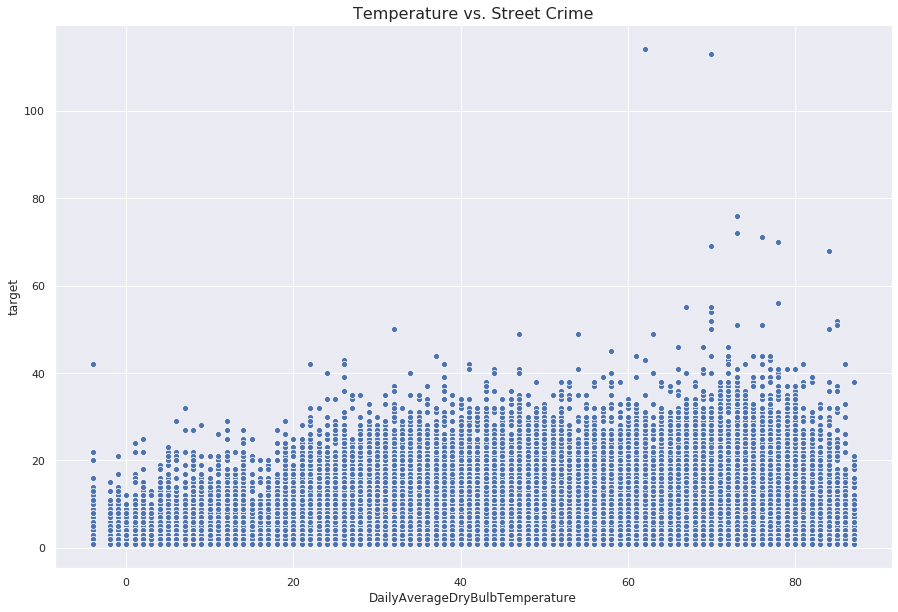

In [0]:
#seaborn scatterplot

sns.scatterplot(x = 'DailyAverageDryBulbTemperature', y = 'target', data = X.assign(target = y)).set_title('Temperature vs. Street Crime', fontsize = 16)

Text(0.5, 1.0, 'Average Wind Speed vs. Street Crime')

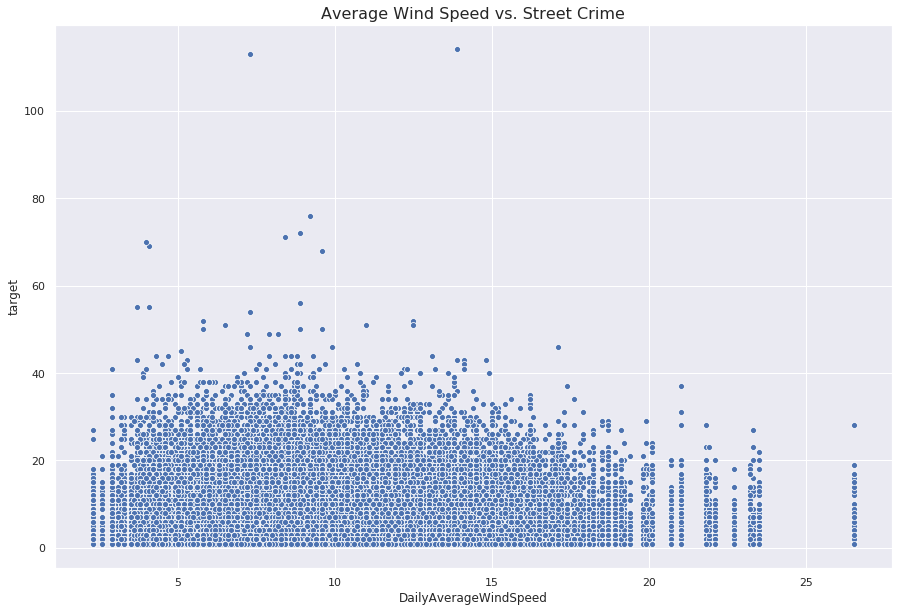

In [0]:
sns.scatterplot(x = 'DailyAverageWindSpeed', y = 'target', data = X.assign(target = y)).set_title('Average Wind Speed vs. Street Crime', fontsize = 16)

Text(0.5, 1.0, 'Day of Month vs. Street Crime')

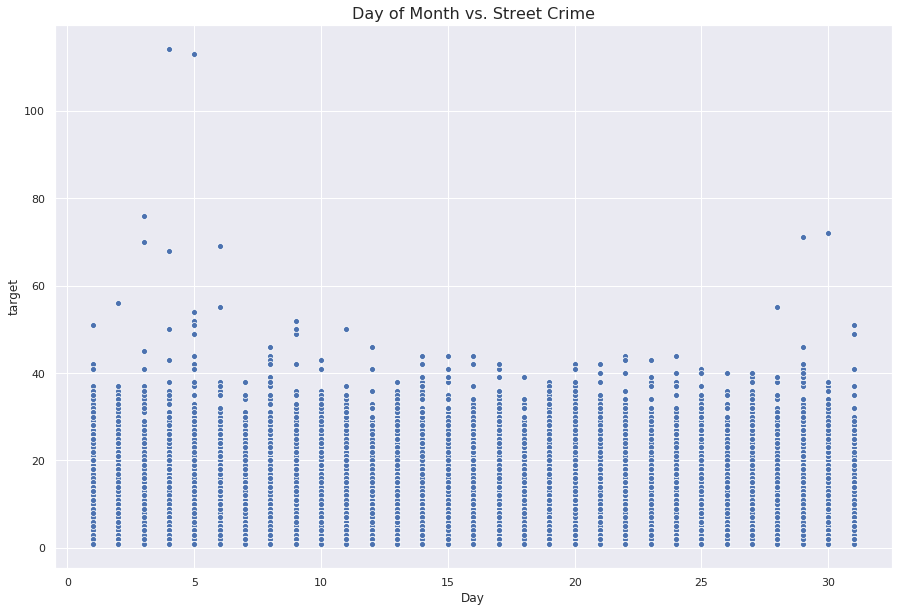

In [0]:
sns.scatterplot(x = 'Day', y = 'target', data = X.assign(target = y)).set_title('Day of Month vs. Street Crime', fontsize = 16)

Text(0.5, 1.0, 'Day of Week vs. Street Crime')

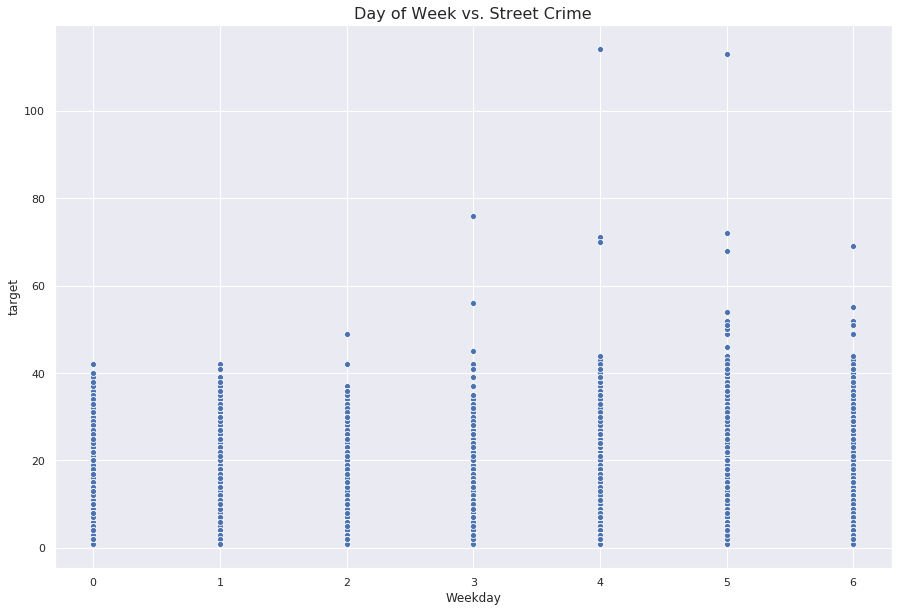

In [0]:
sns.scatterplot(x = 'Weekday', y = 'target', data = X.assign(target = y)).set_title('Day of Week vs. Street Crime', fontsize = 16)

In [0]:
rf=model

In [0]:

from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# show feature importances

base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp

,feature,feature_importance
0,Community_Area,0.706764
1,DailyAverageDryBulbTemperature,0.078681
2,DailyAverageWindSpeed,0.059499
3,Weekday,0.047725
4,Day,0.047357
5,Month,0.031720
6,DailyPrecipitation,0.023770
7,DailySnowDepth,0.004485


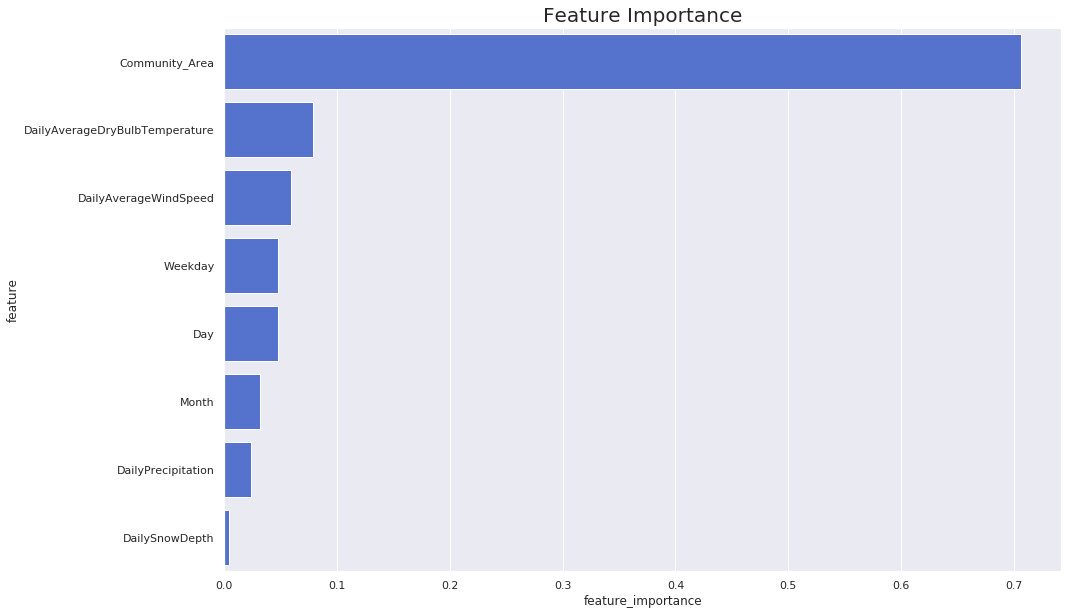

In [0]:
# Chart feature importances

var_imp_plot(base_imp, 'Feature Importance')

In [0]:
# inspect target

y_train.describe()

count    102314.000000
mean          6.328381
std           5.638001
min           1.000000
25%           2.000000
50%           5.000000
75%           8.000000
max         114.000000
Name: Crimes_per_day, dtype: float64

In [0]:
# inspect target

y_test.describe()

count    24977.000000
mean         6.107859
std          5.741939
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        117.000000
Name: Crimes_per_day, dtype: float64

In [0]:
# get permutation importances

perm_imp_rfpimp

,Importance
Feature,
Community_Area,1.682870
DailyAverageDryBulbTemperature,0.142517
Weekday,0.084749
DailyAverageWindSpeed,0.083023
Day,0.062868
Month,0.046995
DailyPrecipitation,0.030343
DailySnowDepth,0.004720


In [0]:
from sklearn import tree
tree.export_graphviz(rf.estimators_[0],
                     'tree.dot')

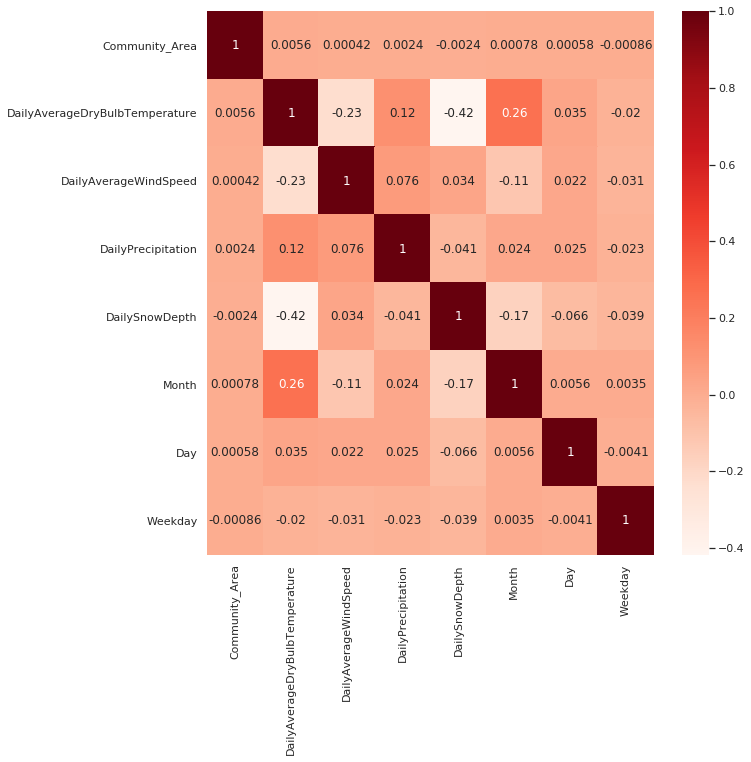

In [0]:
# examine Using Pearson Correlation

plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

##create additional model

In [0]:
# create additional model to satisfy requirements

#This taskes a LONG time to run!

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, random_state=42, max_depth=15, n_jobs=-1)


model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# Score additional model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Validation Accuracy', accuracy_score(y_test, y_pred))

Validation Accuracy 0.19421868118669175


##Create additional visualizations

In [0]:
x = city_crime_and_weather["Date"]
y = city_crime_and_weather['Crimes_per_day']

In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


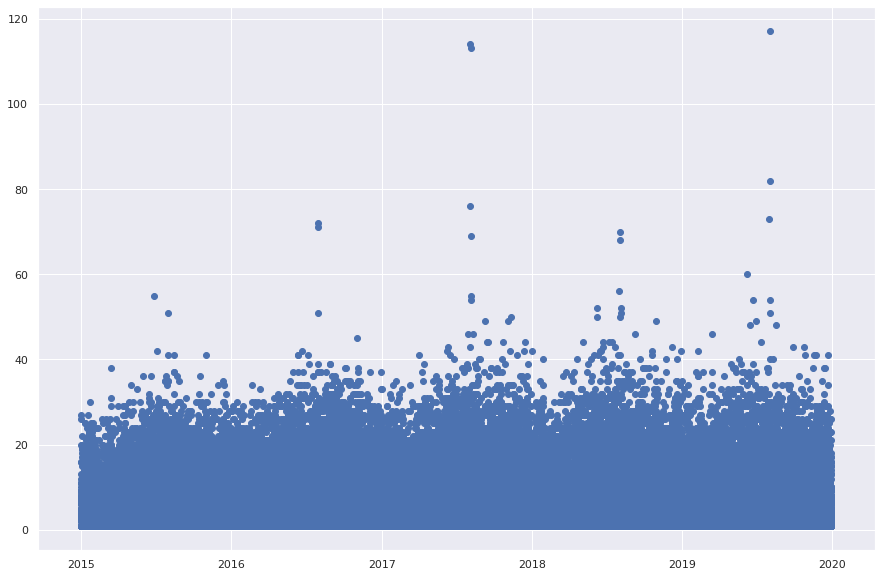

In [0]:
plt.scatter(x,y)
plt.gcf().set_size_inches((15, 10))    
plt.show()  

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

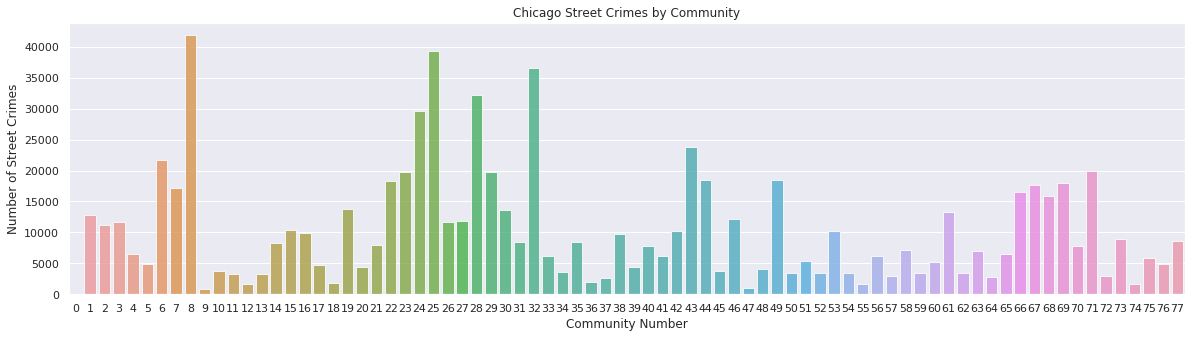

In [0]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
city_count  = total_set['Community Area'].value_counts()
city_count = city_count[:80,]
plt.figure(figsize=(20,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Chicago Street Crimes by Community')
plt.ylabel('Number of Street Crimes', fontsize=12)
plt.xlabel('Community Number', fontsize=12)
plt.show()